In [1]:
import numpy as np
import pandas as pd
#for reading the dataset
import os
#for splitting the data
from sklearn import model_selection
#for plotting a graph between frequency and number of words
import matplotlib.pyplot as plt
#for sorting the dict by value in descending order
import operator
#to split the text into individual words
import re
#to use in-built sklearn Multinomial NB classifier
from sklearn.naive_bayes import MultinomialNB
#to print classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
#stop words not to be added in dictionary
stop_words = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren",
              "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by",
              "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don",
              "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn",
              "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself",
              "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll",
              "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't",
              "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves",
              "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn",
              "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves",
              "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very",
              "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who",
              "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're",
              "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's",
              "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll",
              "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would"]

In [3]:
#creating list x and y where x has documents(texts) and y holds the class names for the classifier
x = [] 
y = []
#using os.listdir to iterate through the 20 classes in the dataset folder
for folder in os.listdir(r"C:\Users\daddy\Desktop\20_newsgroups"):
    #now iterating tthrough the documents in each class of dataset folder
    for doc in os.listdir(r"C:\Users\daddy\Desktop\20_newsgroups\\" + folder):
        #opening the documents in read-state and appending them to x and y having documents and class names respectively
        with open(r"C:\Users\daddy\Desktop\20_newsgroups\\"+folder+'\\'+doc, "r") as doc_ds:
            x.append((doc,doc_ds.read()))
            y.append(folder)

In [4]:
#splitting the dataset int training and testing data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, random_state = 0)

In [5]:
#making the dictionary having count of all words
count = {}
#iterating over all rows of training dataset
for i in range(len(x_train)):
    #0th column holds a length 5 string and 1st columns hold the text of that document
    text=x_train[i][1].lower()
    #splitting the text into individual words using re.split function
    words=re.split(r'\W+',text)
    #iterating over all individual words to create the count dict
    for word in words:
        #to skip the iteration if the word is an alphanumeric or a stop word or if length of word is less than or equal to 1
        if not(word.isalpha()) or word in stop_words or len(word)<=1:
            continue
        #if word is ok, add it to dictionary and increase frequency if already added
        if word in count:
            count[word]+=1
        else:
            count[word]=1

In [6]:
#sort the count dictionary in descending order by values
sorted_count = sorted(count.items(), key=operator.itemgetter(1),reverse=True)

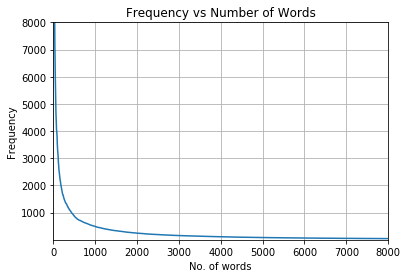

In [7]:
#plot graph between frequency and number of words
df=sorted_count
x_axis = []
y_axis = []
#iterating over the sorted dictionary
for i in range(len(df)):
    #plotting number of words on x-axis
    x_axis.append(i)
    #plotting frequency of those words in y-axis
    y_axis.append(df[i][1])
plt.plot(x_axis,y_axis)
plt.title("Frequency vs Number of Words")
plt.xlabel("No. of words")
plt.ylabel("Frequency")
plt.axis([0,8000,1,8000])
plt.grid()
plt.show()

In [8]:
#I chose top 2000 words to be in my feature set
#iterating over top 2000 words in df which contains the sorted dictionary
top_k_words=[df[i][0] for i in range(2000)]

In [9]:
#To get the dataset in terms of 2d array, we create an array of all 0 having dimensions 
#m*n, where m is number of rows, i.e. len of x_train and n is number of columns, i.e
#length of top_k_words array as calculated above
final_x_ds = np.zeros([len(x_train),len(top_k_words)],int)
for i in range(len(x_train)):
    #splitting the x_train into individual words
    words = x_train[i][1].lower()
    word = re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #update frequency of that word (j) if it is present in our feature set
        if j in top_k_words:
            final_x_ds[i][top_k_words.index(j)] += 1

In [10]:
#Now we are making the final x test dataset in terms of the required 2d array form
final_x_test_ds = np.zeros([len(x_test),len(top_k_words)],int)
for i in range(len(x_test)):
    #splitting the x_test into individual words
    words = x_test[i][1].lower()
    word = re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #update frequency of that word (j) if it is present in our feature set
        if j in top_k_words:
            final_x_test_ds[i][top_k_words.index(j)] += 1

In [11]:
def fit(x_train, y_train):
    y_train=np.array(y_train)
    #the final dictionary required
    result = {}
    #using the set function to get all unique class values
    class_values = set(y_train)
    #storing the total number of classes in our dictionary
    result["total_data"] = len(y_train)
    #iterating over the several classes 
    for current_class in class_values:
        #variable to store number of words in each class
        total_word = 0
        #making a dictionary for each class
        result[current_class] = {}
        #selecting those rows having class value as the current class
        current_class_rows = (y_train == current_class)
        x_train_current = final_x_ds[current_class_rows]
        y_train_current = y_train[current_class_rows]
        #iterating over our feature set
        for word in top_k_words:
            #selecting the ith column from the training dataset
            word_i=(x_train_current[:,top_k_words.index(word)]).sum()
            result[current_class][word]=word_i
            #adding total number of words in a particular class in total_word variable
            total_word+=word_i
        result[current_class]["current_class_words"]=total_word
        #number of rows having class name as current class
        result[current_class]["total_count"] = len(y_train_current)
    #returning the result dictionary
    return result

In [12]:
def probability(dictionary,x,current_class):
    #first, I calculate the probability P(y = current_class)
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    #listing all keys of dictionary
    feature=list(dictionary[current_class].keys())
    #removing current_class_words and total_count features while iteration 
    for j in range (len(feature)-2):
        xj=x[j]
        #If the frequency of that word is 0, then we ignore it
        if xj==0:
            current_prob=0
        else:
            #calculating the probability after applying laplace correction
            n=dictionary[current_class][feature[j]]+1
            d=dictionary[current_class]["current_class_words"]+len(dictionary[current_class].keys())-2
            current_prob=np.log(n)-np.log(d)
        output+=current_prob
        
    return output

In [13]:
#iterating over all classes of our dictionary
#and calculating probability
#returning the prediction in form of the best class
#depending on the probability calculated using the
#probability function
def PredictSinglePoint(dictionary, x):
    first_run=True
    best_prob = -1000
    classes=dictionary.keys()
    for i in classes:
        if i=="total_data":
            continue
        prob=probability(dictionary,x,i)
        if first_run or prob>best_prob:
            best_prob=prob
            best_class=i
        first_run=False
    return best_class

In [14]:
#to calculate the predictions, I created a list
#and appending point-wise probability and best-class in the y_pred list
def predict(x_test,dictionary):
    y_pred=[]
    for x in x_test:
        y_pred.append(PredictSinglePoint(dictionary, x))
    return y_pred

In [15]:
#calculating the score of our Multinomial NB classifier
#which is calculated using mean-accuracy method
#if prediction is correct, we increase count by 1
#and the calculate the mean
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [16]:
#making the y_predictions using the predict function
#and making the final dictionary using the fit function
dictionary=fit(final_x_ds,y_train)
y_pred=predict(final_x_test_ds, dictionary)

In [17]:
#checking the score( mean accuracy) using the score function
#and then printing out the confusion_matrix and classification_report
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.8448
[[201   1   0   0   0   0   1   1   2   2   0   0   1   3   0   0   0   0
    0  21]
 [  0 214   0  19   5   3   4   0   0   1   0   0   3   2   2   0   0   0
    0   0]
 [  0  38   3 127   8  53   3   0   0   0   0   3  10   0   1   0   1   0
    2   0]
 [  0   1   0 223  11   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   2   0  18 210   0   6   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  23   1  10   9 191   1   0   1   0   0   1   2   1   0   0   0   0
    0   0]
 [  0   0   0   9   1   0 235   8   0   0   0   0   6   1   1   0   0   0
    0   0]
 [  0   0   0   0   1   1  10 247   5   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   1 279   0   0   0   0   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   3   0   0 237   8   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   0   5 224   0   0   0   0   0   0   0
    0   0]
 [  0   2   0   0   0   1   0   0  

In [18]:
#USING THE IN-BUILT SK-LEARN CLASSIFIER FOR MULTINOMIAL NAIVE-BAYES
clf=MultinomialNB()
clf.fit(final_x_ds,y_train)
y_pred=clf.predict(final_x_test_ds)
print("Score on training data:",clf.score(final_x_ds,y_train))
print("Score on testing data:",clf.score(final_x_test_ds,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.8599719943988797
Score on testing data: 0.8192
[[188   0   0   0   0   0   1   4   3   0   2   0   0   2   0   1   0   0
    0  32]
 [  1 201   0  16   7  14   3   2   0   0   0   0   5   3   1   0   0   0
    0   0]
 [  0  36  18 116  10  54   7   1   0   0   0   1   5   0   1   0   0   0
    0   0]
 [  0   1   0 210  21   0   5   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   2   0  24 203   0   7   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  22   1  17  12 175   2   0   2   1   0   1   4   1   2   0   0   0
    0   0]
 [  0   0   0   6   4   0 237   6   1   0   1   0   5   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   0  10 240   7   1   2   0   7   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   2   6 274   2   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   4   4   2 224  13   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   3   7 220   0   0   0   1   0   0   0
   

**COMPARISON B/W In-Built MultinomialNB classifier and Self-Implementation Of Multinomial NB classifer**

In [3]:
#Score on testing data by Self-Implemented NB Classifier = 0.8448
#Score on testing data by In-built SKLearn NB classifier = 0.8192

#this shows that even though there's quite difference in the score obtained by both methods
#but in my case, the self-implemented Multinomial NB classifier achieves better score on 
#testing data than in-built sklearn Multinomial NB classifier.